In [ ]:
import pandas as pd
from fbprophet import Prophet

In [3]:
from google.colab import drive


In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


** Read in Data and Process Dates**

In [7]:
df = pd.read_csv('/content/drive/MyDrive/DATA.T/dataset.csv')


In [8]:
df.head()


,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000
1,2012018,2667437,QLD_CW_ST0203,2687.531
2,3012018,2667437,QLD_CW_ST0203,2793.000
3,4012018,2667437,QLD_CW_ST0203,2394.000
4,5012018,2667437,QLD_CW_ST0203,2660.000


recreating the date "ds"

In [10]:
df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])
df['ds'] = pd.DatetimeIndex(df['Year']+'-'+df['Month']+'-'+df['Day'])

droping useless columns such as 'poduct' and 'store' because we only have one . 

In [11]:
df = df.loc[(df['Product']==2667437) & (df['Store']=='QLD_CW_ST0203')]
df.drop(['Time Date', 'Product', 'Store', 'Year', 'Month', 'Day'], axis=1, inplace=True)
df.columns = ['y', 'ds']

In [12]:
df.head()


,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


**Train Model**

In [13]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

**Forecast Away**

In [14]:
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3040.168654,775.559693,4050.097789,3040.168654,3040.168654,-646.907682,-646.907682,-646.907682,462.591916,...,16.646724,16.646724,16.646724,-1126.146323,-1126.146323,-1126.146323,0.0,0.0,0.0,2393.260972
1,2018-01-02,3040.968888,673.519127,3903.220203,3040.968888,3040.968888,-656.878775,-656.878775,-656.878775,462.591916,...,-11.260909,-11.260909,-11.260909,-1108.209782,-1108.209782,-1108.209782,0.0,0.0,0.0,2384.090113
2,2018-01-03,3041.769121,937.902282,3965.202331,3041.769121,3041.769121,-630.891873,-630.891873,-630.891873,462.591916,...,-4.393592,-4.393592,-4.393592,-1089.090198,-1089.090198,-1089.090198,0.0,0.0,0.0,2410.877248
3,2018-01-04,3042.569354,859.675812,3975.019022,3042.569354,3042.569354,-583.805741,-583.805741,-583.805741,462.591916,...,22.468361,22.468361,22.468361,-1068.866019,-1068.866019,-1068.866019,0.0,0.0,0.0,2458.763613
4,2018-01-05,3043.369588,919.313885,3943.172028,3043.369588,3043.369588,-619.671450,-619.671450,-619.671450,462.591916,...,-34.595035,-34.595035,-34.595035,-1047.668332,-1047.668332,-1047.668332,0.0,0.0,0.0,2423.698137


In [18]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1175,2021-03-22,4241.650617,2002.207815,5269.910430,4239.022346,4244.454397,-519.180540,-519.180540,-519.180540,462.591916,...,16.646724,16.646724,16.646724,-998.419181,-998.419181,-998.419181,0.0,0.0,0.0,3722.470077
1176,2021-03-23,4242.718778,2115.769446,5200.560604,4240.030194,4245.592540,-536.641523,-536.641523,-536.641523,462.591916,...,-11.260909,-11.260909,-11.260909,-987.972530,-987.972530,-987.972530,0.0,0.0,0.0,3706.077255
1177,2021-03-24,4243.786939,2239.918474,5338.714819,4241.054107,4246.692054,-522.106981,-522.106981,-522.106981,462.591916,...,-4.393592,-4.393592,-4.393592,-980.305306,-980.305306,-980.305306,0.0,0.0,0.0,3721.679958
1178,2021-03-25,4244.855100,2168.749145,5232.378904,4242.065117,4247.789878,-490.940696,-490.940696,-490.940696,462.591916,...,22.468361,22.468361,22.468361,-976.000974,-976.000974,-976.000974,0.0,0.0,0.0,3753.914404
1179,2021-03-26,4245.923261,2028.289234,5268.503377,4243.076107,4248.888154,-547.561096,-547.561096,-547.561096,462.591916,...,-34.595035,-34.595035,-34.595035,-975.557978,-975.557978,-975.557978,0.0,0.0,0.0,3698.362164


now we plot our predictions

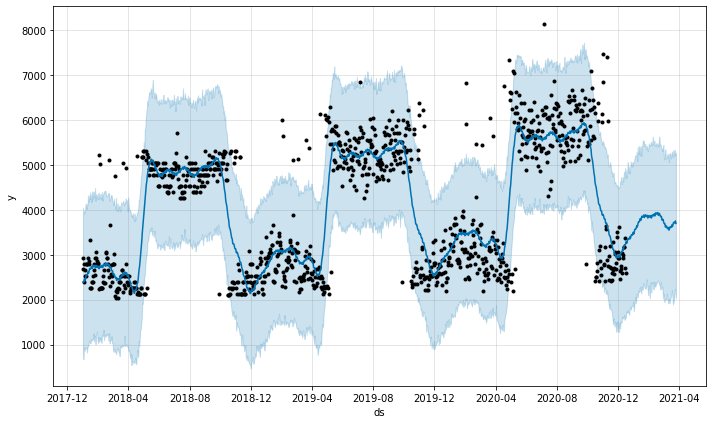

In [15]:
plot1 = m.plot(forecast)

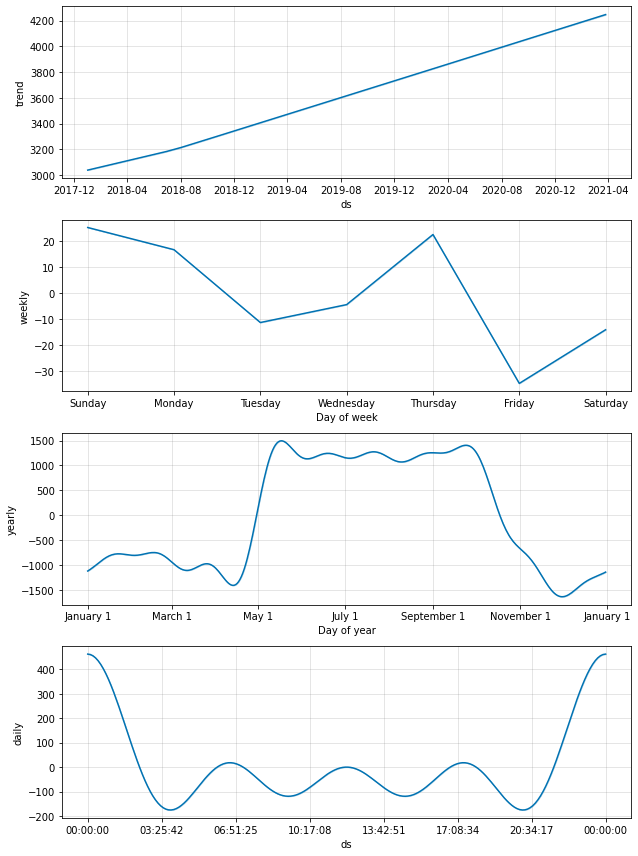

In [16]:
plt2 = m.plot_components(forecast)